### WORD EMBEDDİNGS


Kelime gömme, kelimeleri sürekli bir vektör uzayında anlamlı temsil edecek şekilde 
sayısal vektörlere dönüştürür.

Bu temsiller, kelimeler arasındaki anlamsal ve dil bilgisel ilişkileri yakalamayı hedefler

 Modeller
 
-Word2Vec (Google)

-GloVe

-FastText (Meta)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# PCA(Principle component analysis : Verideki boyutları azaltarak önemli bilgileri koruyan yöntem.
# PCA ile dimension reduction(boyut indirgemesi) yapacağım

In [19]:
from gensim.models import Word2Vec, FastText
from gensim.utils import simple_preprocess

In [21]:
# örnek veri seti
sentences = [
    "Köpek çok tatlı bir hayvandır."
    "Köpekler evcil hayvanlardır."
    "Kediler genellikle nankördür"
    "Köpekler sadık ve dost canlısı hayvanlardır."
    "Hayvanlar insanlar için iyi arkadaşlardır."
]

In [23]:
tokenized_sentences = [simple_preprocess(sentence) for sentence in sentences]

In [25]:
tokenized_sentences

[['köpek',
  'çok',
  'tatlı',
  'bir',
  'hayvandır',
  'köpekler',
  'evcil',
  'hayvanlardır',
  'kediler',
  'genellikle',
  'sadık',
  've',
  'dost',
  'canlısı',
  'hayvanlardır',
  'hayvanlar',
  'insanlar',
  'için',
  'iyi',
  'arkadaşlardır']]

In [27]:
word2_vec_model = Word2Vec(sentences = tokenized_sentences, vector_size = 50, window = 5, min_count = 1, sg =0)

veri seti, kelimelerin embedding vektö boyutu, kelimenin bağlamını oluşturan önündeki ve arkasındaki kelime sayısı,
kelimenin minimum görünme sayısı, mimariyi belirler

In [30]:
fast_text_model = FastText(sentences = tokenized_sentences, vector_size = 50, window = 5, min_count = 1, sg =0)

görselleştirme : PCA

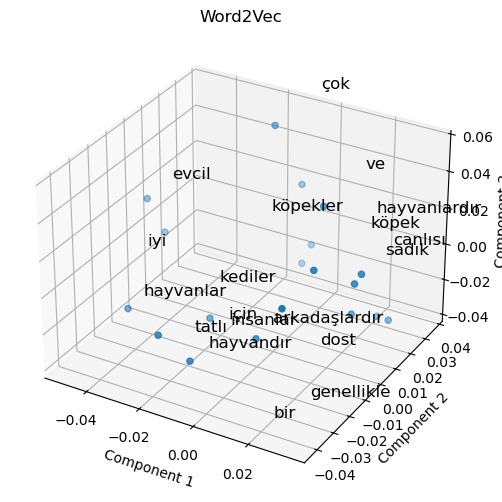

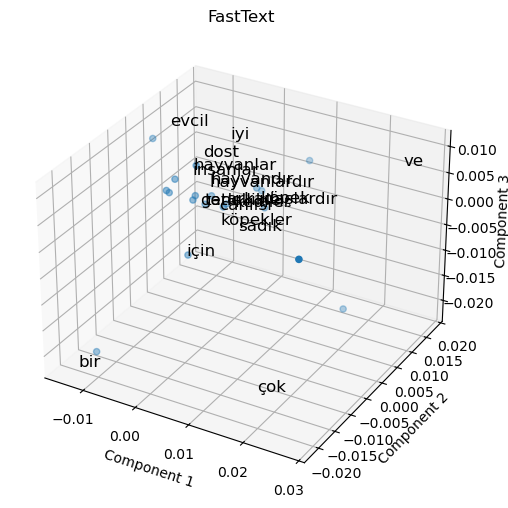

In [47]:
def plot_word_embedding(model, title):
    word_vectors = model.wv
    words = list(word_vectors.index_to_key)[:1000]
    vectors = [word_vectors[word] for word in words]

    # PCA
    pca = PCA(n_components = 3)
    reduced_vectors = pca.fit_transform(vectors)

    # 3D görselleştirme

    fig = plt.figure(figsize = (8,6))
    ax = fig.add_subplot(111, projection ="3d")

    # vektörleri çiz
    ax.scatter(reduced_vectors[:,0],reduced_vectors[:,1], reduced_vectors[:,2])

    # kelimeleri etiketle

    for i, word in enumerate(words):
        ax.text(reduced_vectors[i,0],reduced_vectors[i,2], reduced_vectors[i,2], word, fontsize = 12)

    ax.set_title(title)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")
    plt.show()

plot_word_embedding(word2_vec_model, "Word2Vec")
plot_word_embedding(fast_text_model, "FastText")